In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# plot 한글출력
plt.rcParams['font.family'] = 'NanumGothic'

In [3]:
# warning message 제거
import warnings
warnings.filterwarnings('ignore')

In [4]:
staffs = pd.read_csv('../01.Data_Collection/staffs.csv')
writer_code = pd.read_csv('../01.Data_Collection/writer_code.csv')
writer_detail = pd.read_csv('../01.Data_Collection/writer_detail.csv')
boxoffice = pd.read_csv('../01.Data_Collection/boxoffice.csv')

print(staffs.shape)
print(writer_code.shape)
print(writer_detail.shape)
print(boxoffice.shape)

(107268, 4)
(1015, 5)
(12215, 6)
(802, 18)


In [5]:
print(staffs.isnull().sum())
staffs[staffs['peopleNm'] == '애덤 비첸']

movieCd        0
movieNm        0
peopleNm       0
staffRoleNm    0
dtype: int64


,movieCd,movieNm,peopleNm,staffRoleNm
15314,20100211,다이노 타임,애덤 비첸,시나리오(각본)


In [6]:
print(writer_code.isnull().sum())
writer_code[writer_code['repRoleNm'].isnull()]
# writer_code[writer_code['peopleNm'] == '애덤 비첸']
# writer_code['repRoleNm'].value_counts()

filmoNames    0
movieNm       0
peopleCd      0
peopleNm      0
repRoleNm     1
dtype: int64


,filmoNames,movieNm,peopleCd,peopleNm,repRoleNm
82,다이노 타임,다이노 타임,10045509,애덤 비첸,NaN


In [7]:
# 애덤 비첸 repRoleNm 채우기

writer_code.loc[writer_code['peopleNm'] == '애덤 비첸', 'repRoleNm'] = '시나리오(각본)'

writer_code.isnull().sum()

filmoNames    0
movieNm       0
peopleCd      0
peopleNm      0
repRoleNm     0
dtype: int64

# staffs - writer_code merge
movieNm peopleNm 으로 merge

In [8]:
# staffs 테이블에서 각본가만 따로 저장
# staffs 테이블에서 중복 제거
staff_writer_only = staffs[staffs['staffRoleNm'] == '시나리오(각본)'].drop_duplicates()

print(staff_writer_only.shape)
staff_writer_only.sample()

(961, 4)


,movieCd,movieNm,peopleNm,staffRoleNm
98287,20179230,도어락,박정희,시나리오(각본)


In [9]:
# writer_code 테이블에서 중복 제거
print(writer_code.shape)
writer_code = writer_code.drop_duplicates()

writer_list_count = pd.DataFrame(writer_code.groupby(['movieNm', 'peopleNm'])['peopleCd'].size())
print('2 번 이상 들어간 작가 수', len(writer_list_count[writer_list_count['peopleCd'] > 1]))
writer_list_count[writer_list_count['peopleCd'] > 1]
print(writer_code.shape)

(1015, 5)
2 번 이상 들어간 작가 수 0
(961, 5)


In [10]:
writer_movie_code_merge = staff_writer_only.merge(writer_code, how='inner', on=['movieNm', 'peopleNm'])

print(writer_movie_code_merge.shape)
print(writer_movie_code_merge.isnull().sum())
writer_movie_code_merge.sample()

(961, 7)
movieCd        0
movieNm        0
peopleNm       0
staffRoleNm    0
filmoNames     0
peopleCd       0
repRoleNm      0
dtype: int64


,movieCd,movieNm,peopleNm,staffRoleNm,filmoNames,peopleCd,repRoleNm
196,20156250,인천상륙작전,이재한,시나리오(각본),인천상륙작전 : 익스텐디드 에디션(확장판)|인천상륙작전|제3의 사랑|포화속으로|사요...,10057235,감독


## 위의 merge 한 테이블과 writer_detail 테이블 merge
movieCd, peopleCd

In [11]:
writer_movie_code_merge.sample()
writer_movie_code_merge.dtypes

movieCd         int64
movieNm        object
peopleNm       object
staffRoleNm    object
filmoNames     object
peopleCd        int64
repRoleNm      object
dtype: object

In [12]:
writer_detail.sample()
writer_detail.dtypes

movieCd        object
movieNm        object
moviePartNm    object
peopleCd        int64
peopleNm       object
sex            object
dtype: object

In [13]:
# writer_movie_code_merge 의 movieCd 컬럼이 int 이라서 str 로 바꿔준다

writer_movie_code_merge['movieCd'] = writer_movie_code_merge['movieCd'].apply(lambda x: str(x))
writer_movie_code_merge.dtypes

movieCd        object
movieNm        object
peopleNm       object
staffRoleNm    object
filmoNames     object
peopleCd        int64
repRoleNm      object
dtype: object

In [48]:
writers_all = writer_movie_code_merge.merge(writer_detail
                                            , how='inner'
                                            , left_on=['movieCd', 'peopleCd', 'staffRoleNm']
                                            , right_on=['movieCd', 'peopleCd', 'moviePartNm'])
writers_all = writers_all.drop_duplicates()
print(writers_all.shape)
writers_all.sample()

(945, 11)


,movieCd,movieNm_x,peopleNm_x,staffRoleNm,filmoNames,peopleCd,repRoleNm,movieNm_y,moviePartNm,peopleNm_y,sex
1391,20190470,이타미 준의 바다,정다운,시나리오(각본),이타미 준의 바다,20324792,감독,이타미 준의 바다,시나리오(각본),정다운,여자


In [49]:
len(writers_all['movieCd'].drop_duplicates())

670

In [50]:
# 다른 값 있는지 확인
# peopleNm 은 다른 값 있음, 활동명과 다른 이름인 것 같음, 일단 두개 다 남김

writers_all[writers_all['movieNm_x'] != writers_all['movieNm_y']]
writers_all[writers_all['peopleNm_x'] != writers_all['peopleNm_y']]

,movieCd,movieNm_x,peopleNm_x,staffRoleNm,filmoNames,peopleCd,repRoleNm,movieNm_y,moviePartNm,peopleNm_y,sex


In [51]:
# movieNm 은 x, y 내용 같으므로 컬럼 하나만 남긴다

writers_all = writers_all.drop('movieNm_y', axis=1)

In [52]:
# 컬럼명 정리
# peopleNm_x -> writerNm 필명
# peopleNm_y -> peopleNm 영화인 이름
writers_all = writers_all.rename(columns={'movieNm_x':'movieNm', 'peopleNm_x':'writerNm', 'peopleNm_y':'peopleNm'})

writers_all.sample()

,movieCd,movieNm,writerNm,staffRoleNm,filmoNames,peopleCd,repRoleNm,moviePartNm,peopleNm,sex
183,20154323,슈퍼레이서 엔지,허선,시나리오(각본),극장판 뽀잉: 슈퍼 변신의 비밀|슈퍼레이서 엔지,20214806,감독,시나리오(각본),허선,NaN


## 전체 merge 한 파일 Null 값 확인

In [53]:
writers_all.isnull().sum()

movieCd         0
movieNm         0
writerNm        0
staffRoleNm     0
filmoNames      0
peopleCd        0
repRoleNm       0
moviePartNm     0
peopleNm        0
sex            89
dtype: int64

In [54]:
writers_all.sample()

,movieCd,movieNm,writerNm,staffRoleNm,filmoNames,peopleCd,repRoleNm,moviePartNm,peopleNm,sex
236,20136000,레드 툼,구자환,시나리오(각본),해원|레드 툼|회색도시,10002241,감독,시나리오(각본),구자환,남자


## 영화코드별 행 하나로 합친다 
작가(전체 리스트)| 대표작가 | 작가성별 

In [75]:
# 작가 (전체 리스트)

movieCd_list = writers_all['movieCd'].unique()
# 영화코드를 바꿔준다

writer_list = []
for movieCd in movieCd_list:
    writers_of_movie = ''

    data = writers_all[writers_all['movieCd'] == movieCd]
    for writerNm in data['writerNm']:
        if writers_of_movie != '': writers_of_movie += ', '
        writers_of_movie += writerNm
        
    writer_list.append((movieCd, writers_of_movie))

writer_list

[('20148048', '류승완'),
 ('20148851', '이기철, 최동훈'),
 ('20149314', '우민호'),
 ('20145503', '장재현'),
 ('20148846', '조철현, 오승현, 이송원'),
 ('20148845', '이병헌'),
 ('20136068', '수오, 민지은'),
 ('20149570', '김수진, 이남규'),
 ('20148855', '한대덕, 곽경택'),
 ('20149569', '백운학'),
 ('20156557', '황혜순, 김정훈'),
 ('20157464', '김봉주'),
 ('20136888', '유하'),
 ('20140703', '이상현'),
 ('20143572', '김선정, 노경희, 박정예'),
 ('20148188', '김현석'),
 ('20142407', '박진표, 이병헌'),
 ('20149266', '한준희'),
 ('20142402', '이윤성, 민규동'),
 ('20145171', '박훈정'),
 ('20157465', '윤준형, 김영갑'),
 ('20142855', '이공주, 최관영'),
 ('20148461', '손용호, 안영진'),
 ('20145504', '노덕'),
 ('20156748', '서유민, 정기훈'),
 ('20143513', '김제영'),
 ('20131262', '하정우, 김주호'),
 ('20148841', '조사무엘, 신한솔'),
 ('20130566', '오승욱'),
 ('20136063', '김세희'),
 ('20148844', '김광태'),
 ('20148553', '최정미, 문제용, 유선동'),
 ('20140144', '김아영, 이종필'),
 ('20140193', '김익로, 천성일'),
 ('20143511', '최윤진'),
 ('20141224', '이해영'),
 ('20143512', '조중훈'),
 ('20157501', '하기호'),
 ('20136057', '손아람'),
 ('20130021', '박흥식, 최아름'),
 ('20155826'

In [79]:
writer_list = pd.DataFrame(writer_list, columns=['movieCd', '작가'])

print(writer_list.shape)
writer_list.sample()

(670, 2)


,movieCd,작가
402,20170590,김경찬


In [73]:
# 대표 작가 | 작가 코드 | 성별
first_writer = writers_all.groupby('movieCd')['peopleCd', 'writerNm', 'moviePartNm', 'sex'].first().reset_index()

print(first_writer.shape)
first_writer.sample()

(670, 5)


,movieCd,peopleCd,writerNm,moviePartNm,sex
346,20166132,20191566,이상호,시나리오(각본),남자


In [101]:
writer_info = writer_list.merge(first_writer, how='outer', on='movieCd')

# 배우 boxoffice merge 한 테이블 이용해서 merge

In [23]:
actor_boxoffice = pd.read_csv('../01.Data_Collection/films.csv')

print(actor_boxoffice.shape)
actor_boxoffice.sample()

(808, 24)


,순위,영화명,개봉일,매출액,매출액점유율,누적매출액,관객수,누적관객수,스크린수,상영횟수,...,등급,장르,감독,배우,배역명,영화코드,배우코드,주연배우,역할,배우성별
652,55,런닝맨 : 풀룰루의 역습,2018.12.5,"1,420,218,750",0.2%,"1,420,218,750","186,912","186,912",511,"5,521",...,전체관람가,애니메이션,윤준상,"김서영,권창욱,엄상현,김연우,강시현,전태열",리우 목소리,20183745,10004461.0,김서영,배우,여자


In [29]:
actor_boxoffice['역할'].value_counts()

배우    778
감독      2
Name: 역할, dtype: int64

In [ ]:
# 영화코드로 merge

In [102]:
actor_boxoffice['영화코드'].dtypes
writer_info['movieCd'].dtypes
# dtype 다르다

writer_info['movieCd'] = writer_info['movieCd'].apply(lambda x: int(x))
writer_info['movieCd'].dtypes

dtype('int64')

In [104]:
writers_updated = actor_boxoffice.merge(writer_info, how='outer', left_on='영화코드', right_on='movieCd')

writers_updated = writers_updated.drop(['movieCd'], axis=1)
writers_updated = writers_updated.rename(columns={'peopleCd':'작가코드', 'writerNm': '대표작가', 'moviePartNm':'역할_시나리오(각본)', '역할':'역할_배우', 'sex':'작가성별'})
writers_updated.sample()

,순위,영화명,개봉일,매출액,매출액점유율,누적매출액,관객수,누적관객수,스크린수,상영횟수,...,영화코드,배우코드,주연배우,역할_배우,배우성별,작가,작가코드,대표작가,역할_시나리오(각본),작가성별
368,148.0,원스텝,2017.4.6,"13,002,000",0.0%,"13,002,000","1,662","1,662",33,239,...,20172863.0,20169728.0,박산다라,배우,여자,"홍승표, 박지현, 전재홍, 조성걸",20275129.0,홍승표,시나리오(각본),남자


In [105]:
writers_updated.isnull().sum()

순위               2
영화명              2
개봉일              2
매출액              2
매출액점유율           2
누적매출액            2
관객수              2
누적관객수            2
스크린수             2
상영횟수             2
대표국적             2
국적               2
제작사             22
배급사              3
등급               2
장르               2
감독               5
배우              33
배역명            451
영화코드             2
배우코드            30
주연배우            25
역할_배우           30
배우성별            25
작가             140
작가코드           140
대표작가           140
역할_시나리오(각본)    140
작가성별           174
dtype: int64

In [106]:
writers_updated[writers_updated['영화명'].isnull()]

,순위,영화명,개봉일,매출액,매출액점유율,누적매출액,관객수,누적관객수,스크린수,상영횟수,...,영화코드,배우코드,주연배우,역할_배우,배우성별,작가,작가코드,대표작가,역할_시나리오(각본),작가성별
808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,윤용진,20110475.0,윤용진,시나리오(각본),남자
809,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,김의곤,20244869.0,김의곤,시나리오(각본),남자


In [107]:
writers_all[writers_all['writerNm'] == '윤용진']

,movieCd,movieNm,writerNm,staffRoleNm,filmoNames,peopleCd,repRoleNm,moviePartNm,peopleNm,sex
1315,20183144,선종 무문관,윤용진,시나리오(각본),선종 무문관|할|내 마음 속에 작은 영웅들,20110475,감독,시나리오(각본),윤용진,남자


In [111]:
writers_updated['영화코드'] = writers_updated['영화코드'].fillna(20183144)
writers_updated['영화명'] = writers_updated['영화명'].fillna('선종 무문관')

writers_updated.isnull().sum()

순위               2
영화명              0
개봉일              2
매출액              2
매출액점유율           2
누적매출액            2
관객수              2
누적관객수            2
스크린수             2
상영횟수             2
대표국적             2
국적               2
제작사             22
배급사              3
등급               2
장르               2
감독               5
배우              33
배역명            451
영화코드             0
배우코드            30
주연배우            25
역할_배우           30
배우성별            25
작가             140
작가코드           140
대표작가           140
역할_시나리오(각본)    140
작가성별           174
dtype: int64

In [31]:
# 영화명 중복값 있는지 확인
# boxoffice 테이블에는 movieCd 없기 때문에 영화명으로 찾아야 한다
data = pd.DataFrame(boxoffice['영화명'].value_counts().reset_index())

data[data['영화명'] > 1]

,index,영화명


In [131]:
writers_boxoffice_merge = writers_all.merge(boxoffice, how='outer', left_on='movieNm', right_on='영화명')
writers_boxoffice_merge.sample()

,movieCd,movieNm,writerNm,staffRoleNm,filmoNames,peopleCd,repRoleNm,moviePartNm,peopleNm,sex,...,스크린수,상영횟수,대표국적,국적,제작사,배급사,등급,장르,감독,배우
2927,20165562,소녀의 세계,안정민,시나리오(각본),소녀의 세계,20238968.0,감독,감독,안정민,남자,...,14,208,한국,한국,"(주)빅오픽쳐스,(주)날개엔터테인먼트",(주)드림팩트엔터테인먼트,12세이상관람가,멜로/로맨스,안정민,"노정의,조수향,권나라,조수하,김수현,김용연,김현주,박솔,박수연,이경훈"


In [132]:
writers_boxoffice_merge.isnull().sum()

movieCd        132
movieNm        132
writerNm       132
staffRoleNm    132
filmoNames     132
peopleCd       132
repRoleNm      132
moviePartNm    132
peopleNm       132
sex            298
순위              32
영화명             32
개봉일             32
매출액             32
매출액점유율          32
누적매출액           32
관객수             32
누적관객수           32
스크린수            32
상영횟수            32
대표국적            32
국적              32
제작사            146
배급사             35
등급              32
장르              32
감독              35
배우             131
dtype: int64

# 영화별 개봉년도 컬럼 추가하기
boxoffice 테이블의 개봉일 컬럼 이용

In [32]:
# # 개봉일에서 앞 4자리만 가져와서 개봉년도로 넣어준다
# boxoffice['개봉년도'] = boxoffice['개봉일'].apply(lambda x: x[:4])
# boxoffice.sample()

,순위,영화명,개봉일,매출액,매출액점유율,누적매출액,관객수,누적관객수,스크린수,상영횟수,대표국적,국적,제작사,배급사,등급,장르,감독,배우,개봉년도
781,5,나쁜 녀석들: 더 무비,2019.9.11,"39,541,671,284",5.0%,"39,541,671,284","4,571,217","4,571,217","1,511","113,798",한국,한국,"씨제이이앤엠(주),(주)영화사비단길",씨제이이앤엠(주),15세이상관람가,"범죄,액션",손용호,"마동석,김상중,김아중,장기용,강예원,김대영,박형수,김혜윤",2019


In [34]:
# # 영화명으로 writer_sex_ratio 테이블과 boxoffice['개봉년도']를 merge 해준다
# data = writers_all.merge(boxoffice[['영화명', '개봉년도']], how='left', left_on='movieNm', right_on='영화명')

# data = data.drop('영화명', axis=1)
# writers_all = data.rename(columns={'개봉년도':'year'})
# writers_all.sample()

,movieCd,movieNm,writerNm,staffRoleNm,filmoNames,peopleCd,repRoleNm,moviePartNm,peopleNm,sex,year
1935,20173903,역모-반란의 시대,김황성,시나리오(각본),역모-반란의 시대,20283090,시나리오(각본),시나리오(각본),김황성,NaN,2017


# [궁금한 것] movieCd 앞 4자리와 실제 개봉년도 관계 확인하기
movieCd 앞 4자리도 년도처럼 보이는데, 실제 개봉년도와는 차이나는 항목들이 있음

movieCd 앞 4자리는 영화 제작 시작년도? 영진위에 등록한 년도?

# Null 값 확인

In [35]:
writers_all.isnull().sum()

movieCd          0
movieNm          0
writerNm         0
staffRoleNm      0
filmoNames       0
peopleCd         0
repRoleNm        0
moviePartNm      0
peopleNm         0
sex            166
year            32
dtype: int64

In [36]:
writers_all[writers_all['sex'].isnull()]

,movieCd,movieNm,writerNm,staffRoleNm,filmoNames,peopleCd,repRoleNm,moviePartNm,peopleNm,sex,year
176,20156807,뽀로로 극장판 컴퓨터 왕국 대모험,이인균,시나리오(각본),뽀로로 극장판 컴퓨터 왕국 대모험|뽀로로 극장판 슈퍼썰매 대모험,10057072,시나리오(각본),시나리오(각본),이인균,NaN,2015
218,20100211,다이노 타임,애덤 비첸,시나리오(각본),다이노 타임,10045509,시나리오(각본),시나리오(각본),애덤 비첸,NaN,2015
246,20144442,조선마술사,조정화,시나리오(각본),조선마술사|슬기로운 해법|화성으로 간 사나이|해피버스데이|교회누나|묻지마 패밀리,10066948,시나리오(각본),시나리오(각본),조정화,NaN,2015
247,20144442,조선마술사,조정화,시나리오(각본),조선마술사|슬기로운 해법|화성으로 간 사나이|해피버스데이|교회누나|묻지마 패밀리,10066948,시나리오(각본),시나리오(각본),조정화,NaN,2015
248,20144442,조선마술사,조정화,시나리오(각본),조선마술사|슬기로운 해법|화성으로 간 사나이|해피버스데이|교회누나|묻지마 패밀리,10066948,시나리오(각본),시나리오(각본),조정화,NaN,2015
249,20144442,조선마술사,조정화,시나리오(각본),조선마술사|슬기로운 해법|화성으로 간 사나이|해피버스데이|교회누나|묻지마 패밀리,10066948,시나리오(각본),시나리오(각본),조정화,NaN,2015
344,20154323,슈퍼레이서 엔지,허선,시나리오(각본),극장판 뽀잉: 슈퍼 변신의 비밀|슈퍼레이서 엔지,20214806,감독,감독,허선,NaN,2015
345,20154323,슈퍼레이서 엔지,허선,시나리오(각본),극장판 뽀잉: 슈퍼 변신의 비밀|슈퍼레이서 엔지,20214806,감독,기획,허선,NaN,2015
346,20154323,슈퍼레이서 엔지,허선,시나리오(각본),극장판 뽀잉: 슈퍼 변신의 비밀|슈퍼레이서 엔지,20214806,감독,시나리오(각본),허선,NaN,2015
347,20154323,슈퍼레이서 엔지,허선,시나리오(각본),극장판 뽀잉: 슈퍼 변신의 비밀|슈퍼레이서 엔지,20214806,감독,프로듀서,허선,NaN,2015


# [할 것] sex 컬럼 Null 값 채우기

In [37]:
## null 값 검색해서 채우기...

# 대표 작가 한명씩만 가져오기
영화별로 제일 먼저 나오는 이름

In [38]:
data = writers_all.groupby(['movieCd', 'movieNm'])['peopleCd', 'peopleNm', 'sex', 'year'].first()

first_writer = pd.DataFrame(data.reset_index())
print(first_writer.shape) # 왜 이렇게 수가 줄었지
first_writer.sample()

(678, 6)


,movieCd,movieNm,peopleCd,peopleNm,sex,year
351,20166301,썬키스 패밀리,20158548,박소현,여자,2019


In [39]:
# 성별로 그룹바이
first_writer_sex = pd.DataFrame(first_writer.groupby(['sex', 'year'])['peopleCd'].size().reset_index())
# 컬럼명 변경(peopleCd -> count)
first_writer_sex = first_writer_sex.rename(columns={'peopleCd':'count'})
# 성별 Null 값 따로 계산해서 DataFrame 에 넣어주기
first_writer_sex = first_writer_sex.append({'sex':'Null', 'count':first_writer['sex'].isnull().sum()}, ignore_index=True)

first_writer_sex

,sex,year,count
0,남자,2015,106
1,남자,2016,84
2,남자,2017,105
3,남자,2018,107
4,남자,2019,73
5,여자,2015,23
6,여자,2016,47
7,여자,2017,26
8,여자,2018,37
9,여자,2019,28


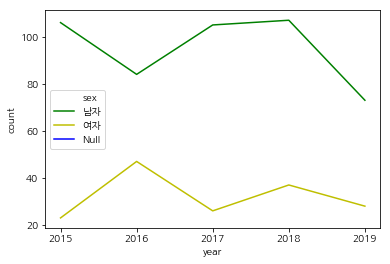

In [40]:
sns.lineplot(x='year', y='count', hue='sex', data = first_writer_sex, palette=['g', 'y', 'b'])

# 영화별 작가 성별 비율 계산

In [56]:
# 영화별 작가 수
writer_sum_by_movie = pd.DataFrame(writers_all.groupby(['movieCd', 'movieNm', 'year']).agg({'sex': 'size'}).reset_index())
writer_sum_by_movie = writer_sum_by_movie.rename(columns={'sex': 'number_of_writer'})
writer_sum_by_movie

# 성별에 따른 영화별 작가 수
female = writers_all[writers_all['sex'] == '여자']
male = writers_all[writers_all['sex'] == '남자']

female_writer_sum_by_movie = pd.DataFrame(female.groupby(['movieCd']).agg({'sex': 'size'}).reset_index())
female_writer_sum_by_movie = female_writer_sum_by_movie.rename(columns={'sex': 'number_of_female_writer'})

male_writer_sum_by_movie = pd.DataFrame(male.groupby(['movieCd']).agg({'sex': 'size'}).reset_index())
male_writer_sum_by_movie = male_writer_sum_by_movie.rename(columns={'sex': 'number_of_male_writer'})

# merge
data = writer_sum_by_movie.merge(female_writer_sum_by_movie, how='left', on='movieCd')
writer_sex_ratio = data.merge(male_writer_sum_by_movie, how='left', on='movieCd')

# Null 값이 있다면 계산 안되므로 0으로 바꿔준다
writer_sex_ratio['number_of_female_writer'] = writer_sex_ratio['number_of_female_writer'].fillna(0)
writer_sex_ratio['number_of_male_writer'] = writer_sex_ratio['number_of_male_writer'].fillna(0)

writer_sex_ratio['female_ratio'] = round(writer_sex_ratio['number_of_female_writer'] * 100 / writer_sex_ratio['number_of_writer'], 2)
writer_sex_ratio['male_ratio'] = round(writer_sex_ratio['number_of_male_writer'] * 100 / writer_sex_ratio['number_of_writer'], 2)

writer_sex_ratio.sample()

,movieCd,movieNm,year,number_of_writer,number_of_female_writer,number_of_male_writer,female_ratio,male_ratio
559,20182585,비스트,2019,2,0.0,2.0,0.0,100.0


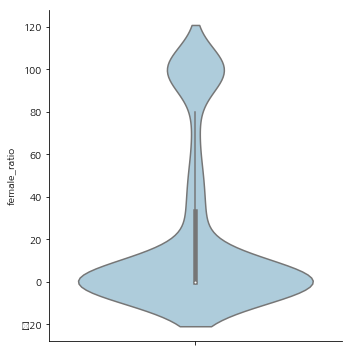

In [57]:
sns.catplot(y='female_ratio', kind='violin', data=writer_sex_ratio, palette='Paired')

여성 작가가 참여하지 않은 작품이 아주 많다

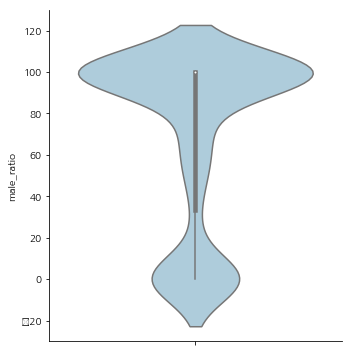

In [58]:
sns.catplot(y='male_ratio', kind='violin', data=writer_sex_ratio, palette='Paired')

반면 남성 작가가 참여하지 않은 작품은 소수

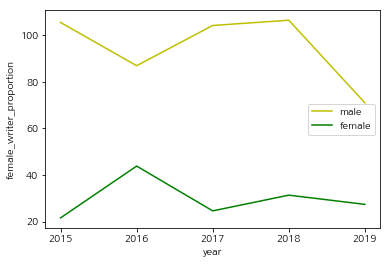

In [59]:
# 혼자 집필했으면 1, 공동집필인 경우 1/N 으로 계산하여 성별 작가 수 산출

data = pd.DataFrame(writer_sex_ratio.groupby('year')['female_ratio'].sum().reset_index())
data['female_writer_proportion'] = data['female_ratio'].apply(lambda x: x / 100)
data1 = pd.DataFrame(writer_sex_ratio.groupby('year')['male_ratio'].sum().reset_index())
data1['male_writer_proportion'] = data1['male_ratio'].apply(lambda x: x / 100)

sns.lineplot(y='male_writer_proportion', x='year', data=data1, color='y', label='male')
sns.lineplot(y='female_writer_proportion', x='year', data=data, color='g', label='female')
plt.legend()
# plt.ylim(0, 600) # 아래의 작가수 전체 합산 그래프와 비교하고 싶으면 ylim 적용해서 y scale 조정

2016 년에 여성작가 수 잠깐 늘었다가 다시 줄어듬
- 위의 첫번째 작가 성비만 가져와서 그린 그래프와 비슷하다

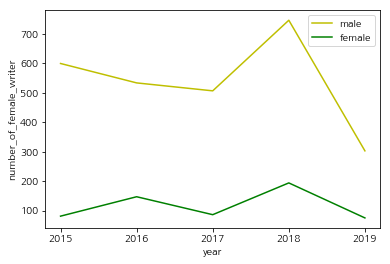

In [60]:
# 성별 작가수 전체 합산

data = pd.DataFrame(writer_sex_ratio.groupby('year')['number_of_female_writer'].sum().reset_index())
data1 = pd.DataFrame(writer_sex_ratio.groupby('year')['number_of_male_writer'].sum().reset_index())

sns.lineplot(y='number_of_male_writer', x='year', data=data1, color='y', label='male')
sns.lineplot(y='number_of_female_writer', x='year', data=data, color='g', label='female')
plt.legend()

집필 인원을 고려하지 않은 전체 작가 성비는 더 큰 차이 난다 (위의 그래프와 y 축 scale 차이 주의)
- 2019 년은 9월까지 데이터만 반영되어 급감하는 것처럼 보임
- 추후 2019년 데이터 추가할 것

# 영화 리스트 다른지 확인
boxoffice 기준으로?

In [66]:
writers_all['movieCd'].value_counts()

20140191    50
20186646    40
20156441    40
20179263    40
20165981    34
20175865    33
20180804    32
20166128    30
20153307    30
20175581    30
20143717    29
20176101    28
20188117    28
20180401    28
20179163    27
20164527    26
20198978    24
20159657    21
20155382    21
20179442    21
20169730    21
20174199    20
20148460    20
20162972    20
20174647    20
20193017    20
20181142    20
20155335    20
20161568    19
20168773    19
            ..
20178161     1
20172641     1
20162461     1
20140703     1
20180063     1
20150966     1
20142621     1
20158483     1
20153313     1
20151228     1
20158504     1
20152746     1
20186651     1
20156047     1
20167102     1
20190741     1
20153316     1
20141589     1
20141060     1
20166127     1
20152402     1
20159224     1
20167903     1
20162145     1
20170670     1
20174846     1
20198183     1
20160261     1
20179006     1
20166384     1
Name: movieCd, Length: 678, dtype: int64

In [74]:
writer_code.sample()
# ['movieCd'].value_counts()

,filmoNames,movieNm,peopleCd,peopleNm,repRoleNm
430,원스텝,원스텝,20275129,홍승표,시나리오(각본)


In [77]:
writer_movie_code_merge['movieCd'].value_counts()

20161568    8
20183745    5
20156441    5
20140704    5
20150979    5
20158242    5
20175527    4
20161603    4
20100211    4
20161762    4
20151227    4
20153801    4
20140241    4
20168161    4
20149258    4
20143717    4
20157064    4
20189746    4
20172863    4
20182490    3
20187322    3
20168250    3
20175581    3
20177845    3
20173965    3
20174348    3
20171817    3
20174243    3
20179205    3
20172469    3
           ..
20165045    1
20169730    1
20136869    1
20143753    1
20153313    1
20152402    1
20198323    1
20160041    1
20172642    1
20143511    1
20130260    1
20120111    1
20185784    1
20155744    1
20188393    1
20163041    1
20162442    1
20141060    1
20141224    1
20166421    1
20143510    1
20163521    1
20153443    1
20176122    1
20160522    1
20172204    1
20181561    1
20145504    1
20157464    1
20166384    1
Name: movieCd, Length: 679, dtype: int64

In [81]:
writer_movie_code_merge[writer_movie_code_merge['movieNm'] == '아빠는 딸']

,movieCd,movieNm,peopleNm,staffRoleNm,filmoNames,peopleCd,repRoleNm
430,20151227,아빠는 딸,김지선,시나리오(각본),아빠는 딸|올드미스다이어리,20111544,시나리오(각본)
431,20151227,아빠는 딸,진나리,시나리오(각본),아빠는 딸|심장이 뛰네,20145369,시나리오(각본)
432,20151227,아빠는 딸,최윤미,시나리오(각본),아빠는 딸,20289451,시나리오(각본)
433,20151227,아빠는 딸,조성우,시나리오(각본),아빠는 딸,20288153,시나리오(각본)


In [82]:
writer_movie_code_merge['movieCd'].value_counts()

20161568    8
20183745    5
20156441    5
20140704    5
20150979    5
20158242    5
20175527    4
20161603    4
20100211    4
20161762    4
20151227    4
20153801    4
20140241    4
20168161    4
20149258    4
20143717    4
20157064    4
20189746    4
20172863    4
20182490    3
20187322    3
20168250    3
20175581    3
20177845    3
20173965    3
20174348    3
20171817    3
20174243    3
20179205    3
20172469    3
           ..
20165045    1
20169730    1
20136869    1
20143753    1
20153313    1
20152402    1
20198323    1
20160041    1
20172642    1
20143511    1
20130260    1
20120111    1
20185784    1
20155744    1
20188393    1
20163041    1
20162442    1
20141060    1
20141224    1
20166421    1
20143510    1
20163521    1
20153443    1
20176122    1
20160522    1
20172204    1
20181561    1
20145504    1
20157464    1
20166384    1
Name: movieCd, Length: 679, dtype: int64

In [68]:
writer_detail['movieCd'].value_counts()

20140191    54
20156441    41
20186646    40
20101066    40
20179263    40
20183390    36
20165981    36
20143717    34
20175865    33
20180804    32
20175581    31
20120107    30
20166128    30
20126624    30
20153307    30
20176101    28
20160787    28
20188117    28
20080887    28
20159657    28
20180401    28
20174647    28
20179163    27
20050106    27
20164527    26
20198978    26
20148840    26
20181366    25
20081510    24
20110239    24
            ..
20130241     1
20060776     1
20137833     1
20060692     1
20101149     1
20135938     1
20139691     1
20147552     1
20011146     1
20157046     1
2010A417     1
20160261     1
20060093     1
20136373     1
20060357     1
20126826     1
20194342     1
20162725     1
20030094     1
20164383     1
20186651     1
20168085     1
20080014     1
20165067     1
20140126     1
20081337     1
20150321     1
20153167     1
20060077     1
19970019     1
Name: movieCd, Length: 3482, dtype: int64

In [70]:
boxoffice['영화명'].value_counts()

귀향, 끝나지 않은 이야기                 1
예수보다 낯선                        1
김복동                            1
하숙집 2                          1
망원동 인공위성                       1
극장판 공룡메카드: 타이니소어의 섬            1
스타박'스 다방                       1
비밥바룰라                          1
어떤살인                           1
상류사회                           1
프리즌                            1
마담 B                           1
미옥                             1
김광석                            1
불온한 당신                         1
워킹걸                            1
마리안느와 마가렛                      1
일진                             1
잡식가족의 딜레마                      1
우상                             1
침입자                            1
꽃보다 처녀귀신                       1
인랑                             1
엄마의 공책                         1
뷰티 인사이드                        1
왕을 참하라                         1
채비                             1
안나 카레니나                        1
맛있는 만남                         1
여자들                            1
          

In [46]:
print(writer_detail.isnull().sum())
writer_detail.sample()
writer_detail[writer_detail['sex'].isnull()]['peopleCd'].unique()

writer_detail[writer_detail['sex'].isnull()]

writer_detail[writer_detail['sex'].isnull()][['peopleCd', 'peopleNm']].drop_duplicates()

movieCd          0
movieNm          0
moviePartNm      0
peopleCd         0
peopleNm         0
sex            225
dtype: int64


,peopleCd,peopleNm
814,10057072,이인균
904,10045509,애덤 비첸
1033,10066948,조정화
1272,20214806,허선
1952,20229799,니쥔
2125,20227240,여필주
2209,20229601,권초원
2859,20200534,조성희
2994,20215586,천진우
3048,20232049,하영준


In [47]:
writer_detail[writer_detail['peopleCd'] == 10057072]

,movieCd,movieNm,moviePartNm,peopleCd,peopleNm,sex
814,20156807,뽀로로 극장판 컴퓨터 왕국 대모험,시나리오(각본),10057072,이인균,NaN
815,20123681,뽀로로 극장판 슈퍼썰매 대모험,시나리오(각본),10057072,이인균,NaN


In [48]:
writer_code_only = pd.DataFrame(writer_detail['peopleCd'].unique(), columns=['peopleCd'])

writer_code_sex = writer_code_only.merge(writer_detail[['peopleCd', 'peopleNm', 'sex']], how='left', on='peopleCd').drop_duplicates()
writer_code_sex.sample()

,peopleCd,peopleNm,sex
9927,20238387,허준형,여자


In [49]:
writer_code_sex.groupby(['sex'])['peopleNm'].count()

sex
남자    532
여자    205
Name: peopleNm, dtype: int64

각본 공동집필이 많다
- 작품별 한명씩 보고
- 작품별 두명씩 보고

In [50]:
boxoffice.sample()

,순위,영화명,개봉일,매출액,매출액점유율,누적매출액,관객수,누적관객수,스크린수,상영횟수,대표국적,국적,제작사,배급사,등급,장르,감독,배우,개봉년도
685,22,항거:유관순 이야기,2019.2.27,"9,291,145,101",1.2%,"9,291,145,101","1,157,887","1,157,887","1,094","46,156",한국,한국,(주)디씨지플러스,롯데컬처웍스(주)롯데엔터테인먼트,12세이상관람가,드라마,조민호,"고아성,김새벽,김예은,정하담,류경수,최무성",2019


In [51]:
staffs.sample()

,movieCd,movieNm,peopleNm,staffRoleNm
95390,20177538,완벽한 타인,이승제,VFX 슈퍼바이저


In [52]:
staffs[staffs['staffRoleNm'] == '시나리오(각본)'].groupby(['movieCd'])['peopleNm'].count()

# staffs[(staffs['staffRoleNm'] == '시나리오(각본)') & (staffs['movieCd'] == 20100211)]
staffs[(staffs['staffRoleNm'] == '시나리오(각본)') & (staffs['movieCd'] == 20120422)]

,movieCd,movieNm,peopleNm,staffRoleNm
45679,20120422,거미의 땅,김동령,시나리오(각본)
45680,20120422,거미의 땅,박경태,시나리오(각본)


In [53]:
writer_detail[writer_detail['peopleNm'] == '김동령']
writer_detail[writer_detail['peopleNm'] == '박경태']

,movieCd,movieNm,moviePartNm,peopleCd,peopleNm,sex
4758,20190665,임신한 나무와 도깨비,감독,10028435,박경태,남자
4759,20120422,거미의 땅,감독,10028435,박경태,남자
4760,20120422,거미의 땅,시나리오(각본),10028435,박경태,남자
4761,20120422,거미의 땅,편집,10028435,박경태,남자
4762,20120422,거미의 땅,촬영,10028435,박경태,남자
4763,20090349,사당동 더하기 22,감독,10028435,박경태,남자
4764,20090349,사당동 더하기 22,촬영,10028435,박경태,남자
4765,20060444,나와 부엉이,감독,10028435,박경태,남자


In [54]:
boxoffice[boxoffice['영화명'] == '거미의 땅']

,순위,영화명,개봉일,매출액,매출액점유율,누적매출액,관객수,누적관객수,스크린수,상영횟수,대표국적,국적,제작사,배급사,등급,장르,감독,배우,개봉년도
168,179,거미의 땅,2016.1.14,"6,489,100",0.0%,"7,667,100","1,025","1,291",6,113,한국,한국,(주)시네마달,(주)시네마달,15세이상관람가,다큐멘터리,"박경태,김동령",NaN,2016


각본은 순서를 알 수 없음

감독이 각본을 쓴 경우에는 boxoffice 에서 확인가능

In [55]:
# 외국인

# writer_distinct = writer_detail[writer_detail['sex'].isnull()][['peopleCd', 'peopleNm']].drop_duplicates()

# writer_distinct['Korean'] = (len(writer_distinct['peopleNm']) == 3) # 왜 안됨???

# # len(writer_distinct['peopleNm'][814])
# writer_distinct